<a href="https://colab.research.google.com/github/Keshigami/Machine-Learning/blob/main/Employee_Turnover_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#Step1 - Perform data quality checks by checking for missing values, if any.
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
sales,object
salary,object


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df['sales'] = le.fit_transform(df['sales'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


<Axes: >

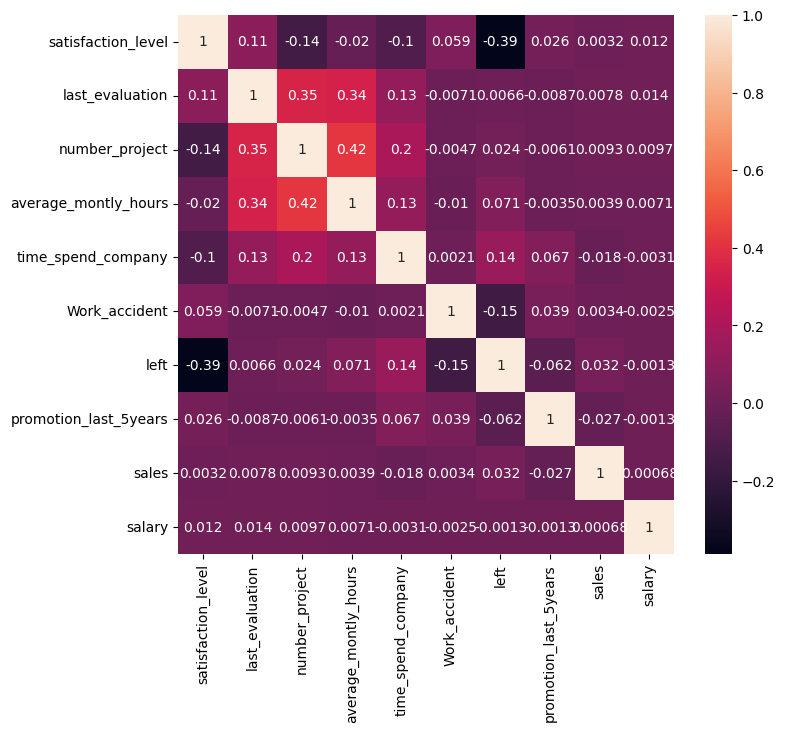

In [ ]:
#Step2 -Understand what factors contributed most to employee turnover at EDA.
#2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
#numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
#       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
#       'promotion_last_5years']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True)

<Figure size 600x500 with 0 Axes>

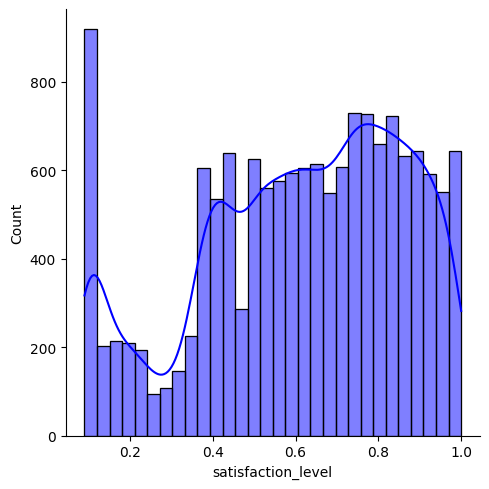

In [ ]:
#Step3 - Draw the distribution plot of:
#Employee Satisfaction (use column satisfaction_level)
#Employee Evaluation (use column last_evaluation)
#Employee Average Monthly Hours (use column average_montly_hours)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
#plt.subplot(1,3,1)
sns.displot(x='satisfaction_level',data=df,color='blue',kde=True)
#plt.subplot(1,3,2)
#sns.displot(x='last_evaluation',data=df,color='green',kde=True)
#plt.subplot(1,3,3)
#sns.displot(x='average_montly_hours',data=df,color='yellow',kde=True)

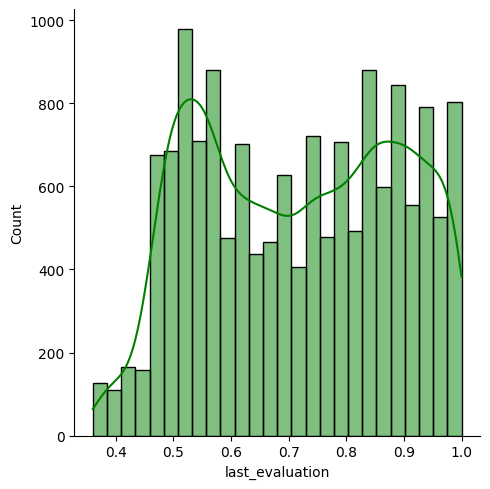

In [ ]:
sns.displot(x='last_evaluation',data=df,color='green',kde=True)

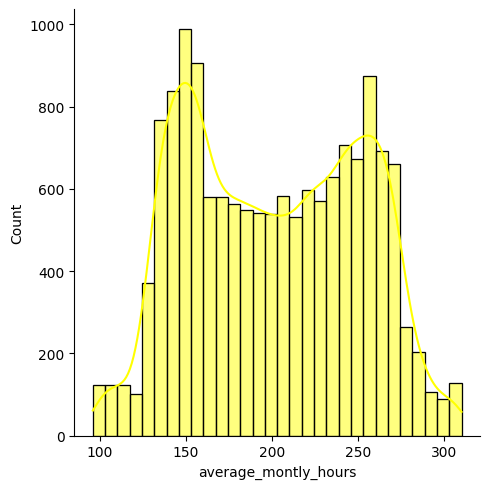

In [ ]:
sns.displot(x='average_montly_hours',data=df,color='yellow',kde=True)

<Axes: xlabel='number_project', ylabel='count'>

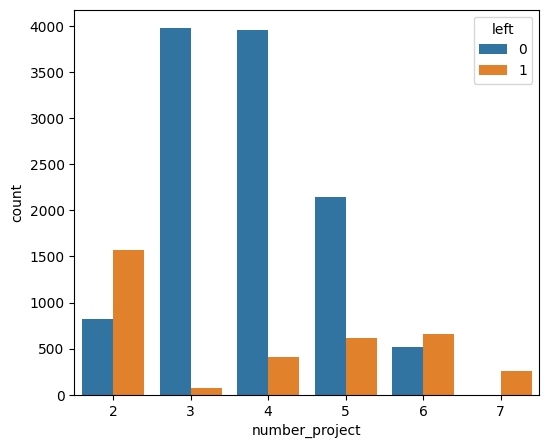

In [ ]:
#step4 - Draw the bar plot of the employee project count of both employees
#who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.
plt.figure(figsize=(6,5))
sns.countplot(x='number_project',hue='left',data=df)

In [ ]:
#Step5 - Perform clustering of employees who left based on their satisfaction and evaluation.
#Choose columns satisfaction_level, last_evaluation, and left.
#Do K-means clustering of employees who left the company into 3 clusters?
#Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
df_left = df[df['left']==1]
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
df_left['cluster'] = km.fit_predict(df_left[['satisfaction_level','last_evaluation']])
df_left.head()

<ipython-input-21-04284231f1e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['cluster'] = km.fit_predict(df_left[['satisfaction_level','last_evaluation']])


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,7,1,0
1,0.80,0.86,5,262,6,0,1,0,7,2,2
2,0.11,0.88,7,272,4,0,1,0,7,2,1
3,0.72,0.87,5,223,5,0,1,0,7,1,2
4,0.37,0.52,2,159,3,0,1,0,7,1,0


In [ ]:
km.cluster_centers_

array([[0.41014545, 0.51698182],
       [0.11115466, 0.86930085],
       [0.80851586, 0.91170931]])

<ipython-input-23-d6001e5e0bdb>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


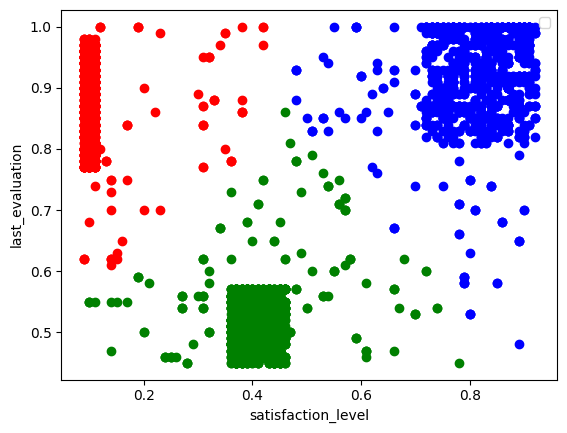

In [ ]:
df1 = df_left[df_left['cluster']==0]
df2 = df_left[df_left['cluster']==1]
df3 = df_left[df_left['cluster']==2]

plt.scatter(df1['satisfaction_level'],df1['last_evaluation'],color='green')
plt.scatter(df2['satisfaction_level'],df2['last_evaluation'],color='red')
plt.scatter(df3['satisfaction_level'],df3['last_evaluation'],color='blue')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()

In [ ]:
#elbow method
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df_left[['satisfaction_level','last_evaluation']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'wcss')

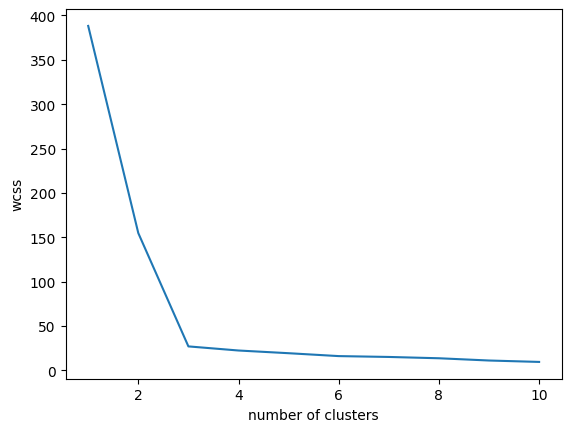

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
#Step6 - Handle the left Class Imbalance using the SMOTE technique.
#Pre-process the data by converting categorical columns to numerical
#columns by:
#Separating categorical variables and numeric variables
#Applying get_dummies() to the categorical variables
#Combining categorical variables and numeric variables
df['left'].value_counts()

,count
left,
0,11428
1,3571


In [ ]:
#Step7- Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
from sklearn.model_selection import train_test_split
X = df.drop('left',axis=1)
y = df['left']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123,sampling_strategy=0.8)
X_train_upsampled,y_train_upsampled = sm.fit_resample(X_train,y_train)
y_train_upsampled.value_counts()

,count
left,
0,9137
1,7309


In [ ]:
#Step8- Perform 5-fold cross-validation model training and evaluate performance.
#Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
#Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
#Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbm = GradientBoostingClassifier()

In [ ]:
lr.fit(X_train,y_train)
rfc.fit(X_train,y_train)
gbm.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=123, shuffle=True)
results = model_selection.cross_val_score(lr, X,y, cv=kfold)
print(results.mean())

0.7676514615983105


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=123, shuffle=True)
results = model_selection.cross_val_score(rfc, X,y, cv=kfold)
print(results.mean())

0.9925994887184618


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=123, shuffle=True)
results = model_selection.cross_val_score(gbm, X,y, cv=kfold)
print(results.mean())

0.9753318884072468


In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print('classification report for logistic regression\n',classification_report(y_test,y_pred_lr))

classification report for logistic regression
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2291
           1       0.48      0.23      0.31       709

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000



In [ ]:
from sklearn.metrics import classification_report
print('classification report for Random Forest classifier\n',classification_report(y_test,y_pred_rfc))

classification report for Random Forest classifier
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2291
           1       1.00      0.98      0.99       709

    accuracy                           0.99      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
from sklearn.metrics import classification_report
print('classification report for gradient boosting classifier\n',classification_report(y_test,y_pred_gbm))

classification report for gradient boosting classifier
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2291
           1       0.96      0.93      0.95       709

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
from sklearn.metrics import confusion_matrix
print('logistic regression')
confusion_matrix(y_test,y_pred_lr)

logistic regression


array([[2113,  178],
       [ 546,  163]])

In [ ]:
#Training models on upsampled data
lr.fit(X_train_upsampled,y_train_upsampled)
rfc.fit(X_train_upsampled,y_train_upsampled)
gbm.fit(X_train_upsampled,y_train_upsampled)

GradientBoostingClassifier()

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy score for logistic regression',accuracy_score(y_test,y_pred_lr))
print('accuracy score for Random Forest classifier',accuracy_score(y_test,y_pred_rfc))
print('accuracy score for gradient boosting classifier',accuracy_score(y_test,y_pred_gbm))

accuracy score for logistic regression 0.761
accuracy score for Random Forest classifier 0.993
accuracy score for gradient boosting classifier 0.969


In [ ]:
from sklearn.metrics import classification_report
print('classification report for logistic regression upsampled\n',classification_report(y_test,y_pred_lr))
print('classification report for Random Forest classifier upsampled\n',classification_report(y_test,y_pred_rfc))
print('classification report for gradient boosting classifier upsampled\n',classification_report(y_test,y_pred_gbm))

classification report for logistic regression upsampled
               precision    recall  f1-score   support

           0       0.89      0.79      0.83      2291
           1       0.50      0.68      0.57       709

    accuracy                           0.76      3000
   macro avg       0.69      0.73      0.70      3000
weighted avg       0.80      0.76      0.77      3000

classification report for Random Forest classifier upsampled
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2291
           1       0.99      0.98      0.99       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

classification report for gradient boosting classifier upsampled
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2291
           1       0.93      0.94      0.93       70

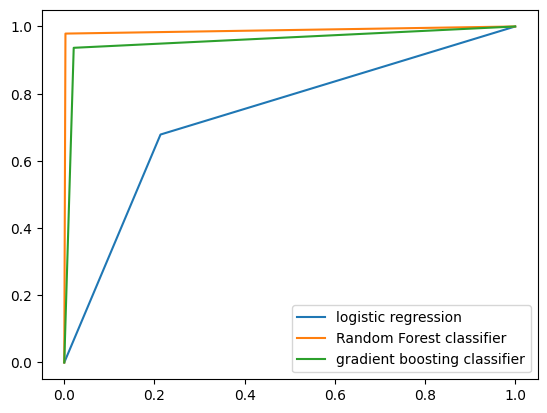

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
fpr_lr,tpr_lr,thresholds_lr = roc_curve(y_test,y_pred_lr)
fpr_rfc,tpr_rfc,thresholds_rfc = roc_curve(y_test,y_pred_rfc)
fpr_gbm,tpr_gbm,thresholds_gbm = roc_curve(y_test,y_pred_gbm)
plt.plot(fpr_lr,tpr_lr,label='logistic regression')
plt.plot(fpr_rfc,tpr_rfc,label='Random Forest classifier')
plt.plot(fpr_gbm,tpr_gbm,label='gradient boosting classifier')
plt.legend()

In [ ]:
print('logistic regression AUC score',roc_auc_score(y_test,y_pred_lr))
print('Random Forest classifier AUC score',roc_auc_score(y_test,y_pred_rfc))
print('gradient boosting classifier AUC score',roc_auc_score(y_test,y_pred_gbm))

logistic regression AUC score 0.7324881996701388
Random Forest classifier AUC score 0.988112248887072
gradient boosting classifier AUC score 0.9577893874294396


In [ ]:
# Random forest classifier
y_prob = rfc.predict_proba(X_test)
y_prob

array([[0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.96, 0.04],
       [1.  , 0.  ]])

In [ ]:
X_test['probability'] = y_prob[:,1]
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,probability
6958,0.54,0.67,3,154,2,0,0,7,0,0.01
7534,0.72,0.52,3,143,4,1,0,8,1,0.00
2975,0.95,0.61,3,267,2,0,0,1,1,0.00
3903,0.78,0.79,3,203,2,0,0,7,1,0.07
8437,0.60,0.40,3,146,4,1,0,9,1,0.00


In [ ]:
#probability - 0-0.2 green and 0.2-0.6 yellow and 0.6-0.9 orange and greater than 0.9 is red
import pandas as pd

# Create a function to assign colors based on probability
def color_assignment(probability):
    if 0 <= probability <= 0.2:
        return 'green'
    elif 0.2 < probability <= 0.6:
        return 'yellow'
    elif 0.6 < probability <= 0.9:
        return 'orange'
    elif probability > 0.9:
        return 'red'
    else:
        return 'undefined' #Handle cases outside of the given range

#Apply the function to create the new column
X_test['Risk_Zone'] = X_test['probability'].apply(color_assignment)

In [ ]:
X_test['Risk_Zone'].value_counts()

,count
Risk_Zone,
green,2204
red,665
yellow,99
orange,32


In [ ]:
# prompt: save a model

import joblib

# Assuming 'rfc' is your trained RandomForestClassifier model
# Replace 'your_model_filename.pkl' with your desired filename
joblib.dump(rfc, 'random_forest_model.pkl')


['random_forest_model.pkl']